In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
with open('DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [98]:
df = pd.read_csv('DATA/Ames_outliers_removed.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [100]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [101]:
df = df.drop('PID', axis=1)

In [102]:
len(df.columns)

80

In [103]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [104]:
def percentMissing(df):
    percentNaN = 100 * df.isnull().sum() / len(df)
    percentNaN = percentNaN[percentNaN > 0].sort_values()
    
    return percentNaN

In [105]:
percentNanResult = percentMissing(df)

In [106]:
percentNanResult

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

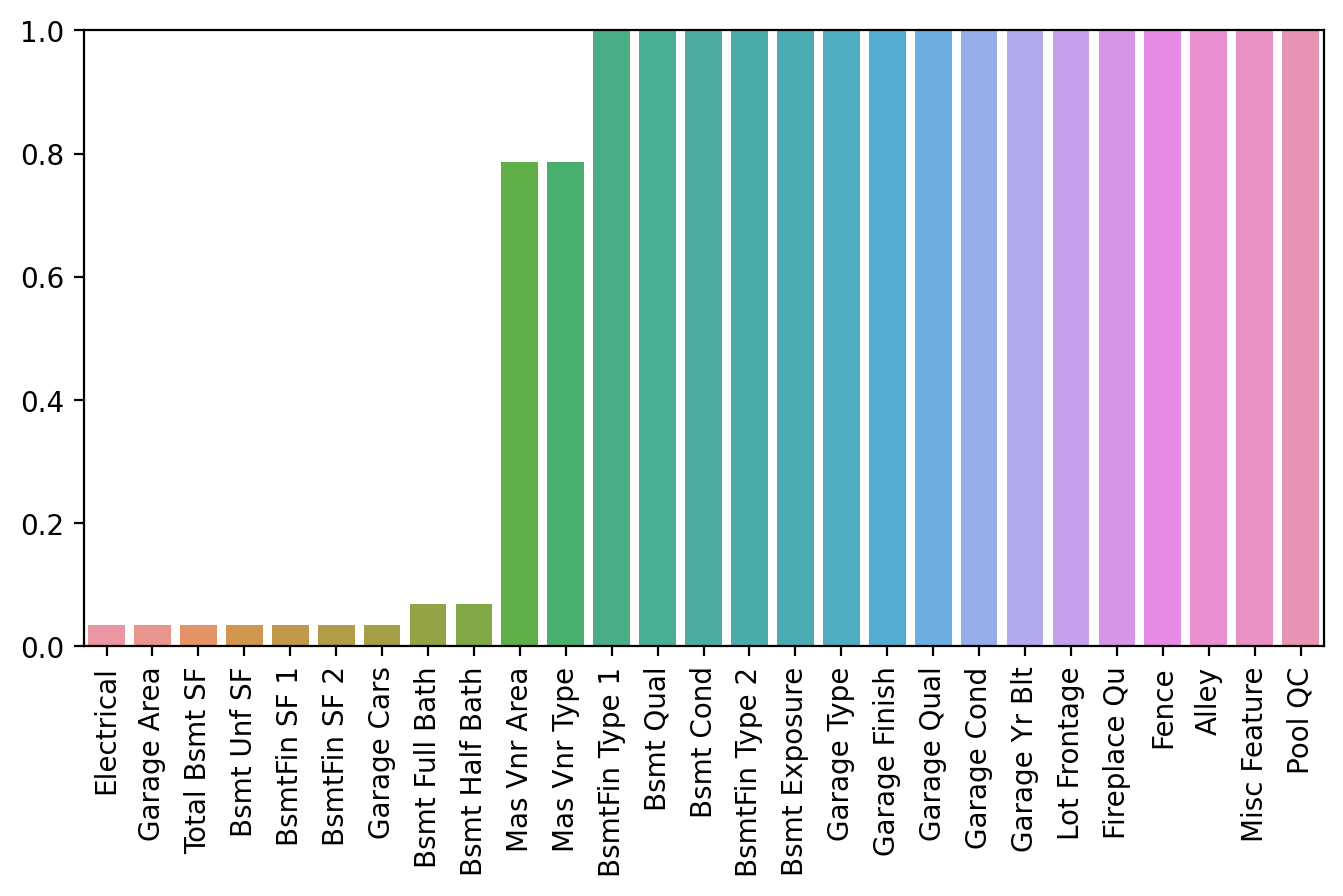

In [107]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percentNanResult.index, y=percentNanResult)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [108]:
percentNanResult[percentNanResult <1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [109]:
100/len(df)

0.0341646737273659

In [110]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [111]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [112]:
percentNanResult = percentMissing(df)

In [113]:
percentNanResult[percentNanResult < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

(0.0, 1.0)

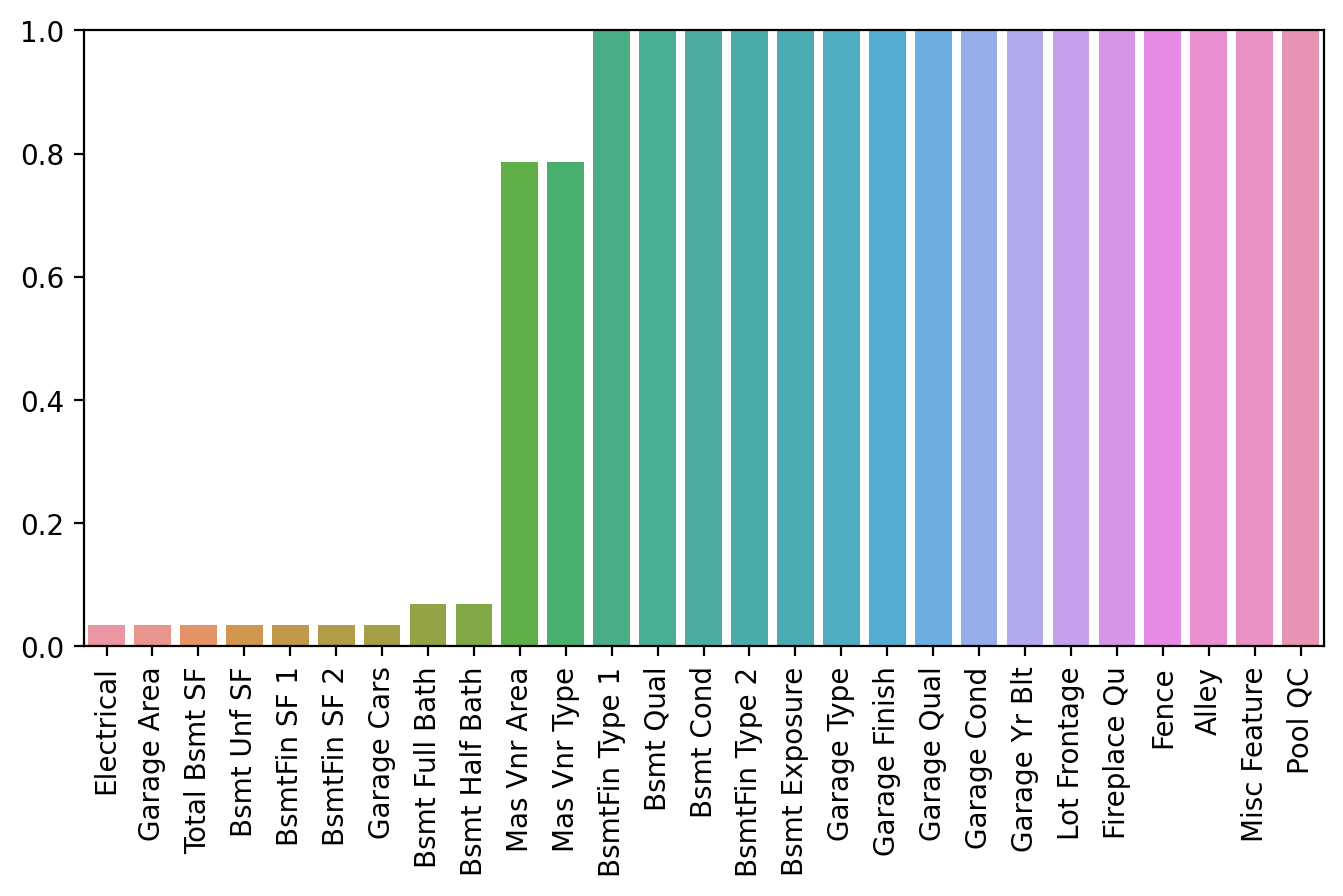

In [114]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percentNanResult.index, y=percentNanResult)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [115]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [116]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [117]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [118]:
# BSMT NUMERIC COLUMNS --> Fill null values as 0
bsmtNumCols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmtNumCols] = df[bsmtNumCols].fillna(0)

# BSMT STRING COLUMNS
bsmStrCols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmtStrCols] = df[bsmtStrCols].fillna('None')

In [119]:
percentNanResult = percentMissing(df)

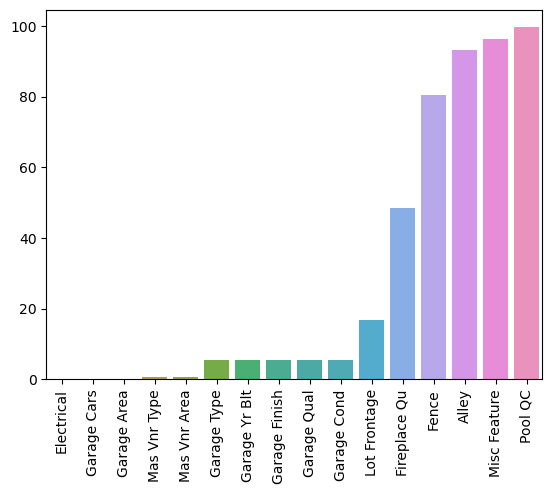

In [120]:
percentNanResult = percentMissing(df)

sns.barplot(x=percentNanResult.index,y=percentNanResult)
plt.xticks(rotation=90);

In [121]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [122]:
percentNanResult = percentMissing(df)

(0.0, 1.0)

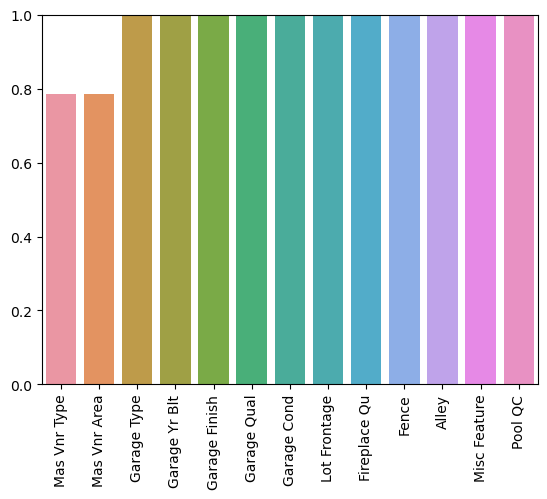

In [123]:
sns.barplot(x=percentNanResult.index,y=percentNanResult)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [124]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [125]:
percentNanResult = percentMissing(df)

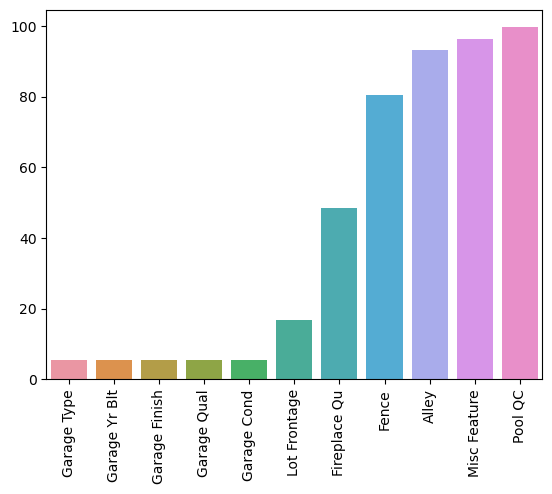

In [126]:
sns.barplot(x=percentNanResult.index,y=percentNanResult)
plt.xticks(rotation=90);

In [127]:
garageStrCols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [128]:
df[garageStrCols] = df[garageStrCols].fillna('None') 

In [129]:
percentNanResult = percentMissing(df)

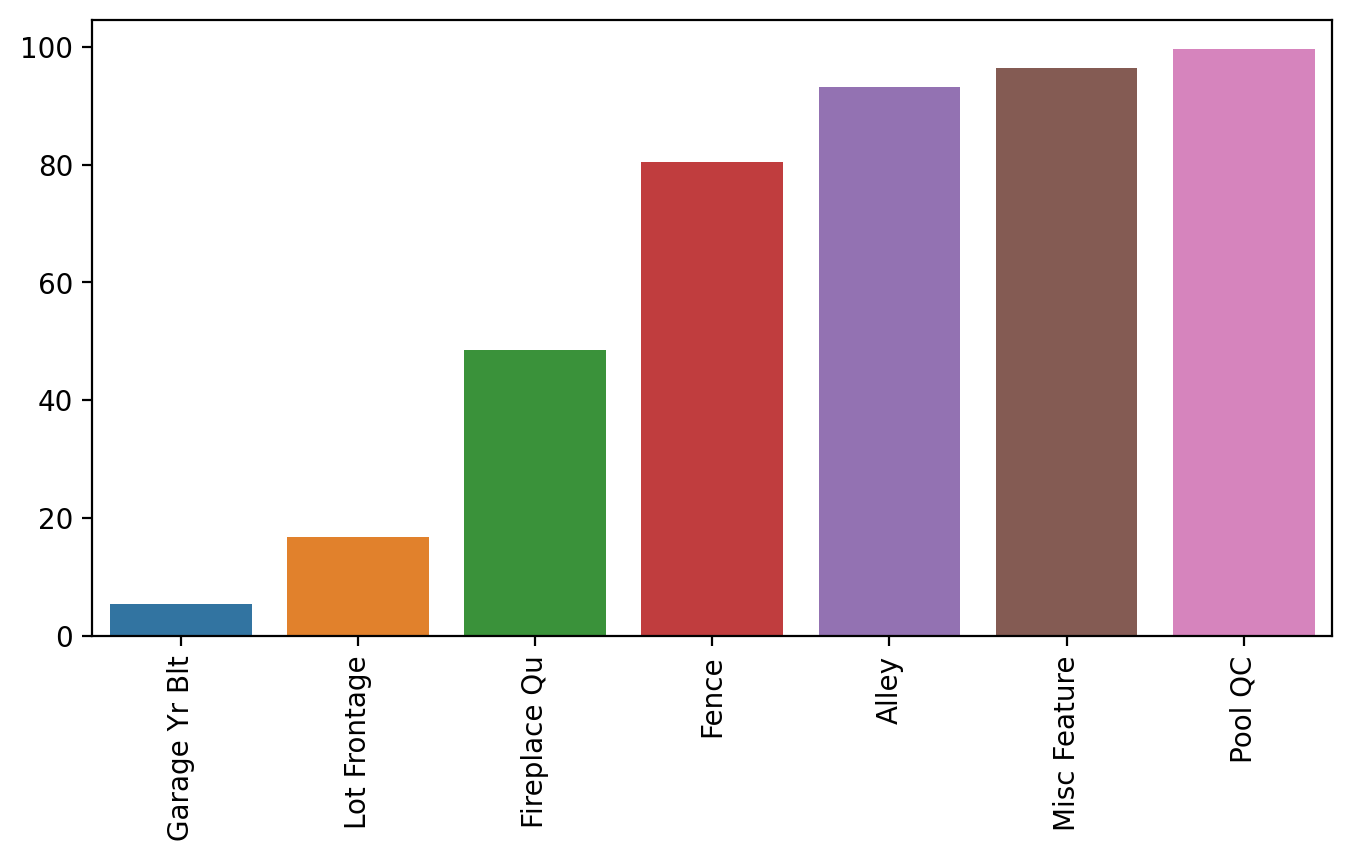

In [130]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percentNanResult.index,y=percentNanResult)
plt.xticks(rotation=90);

In [131]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [132]:
percentNanResult = percentMissing(df)

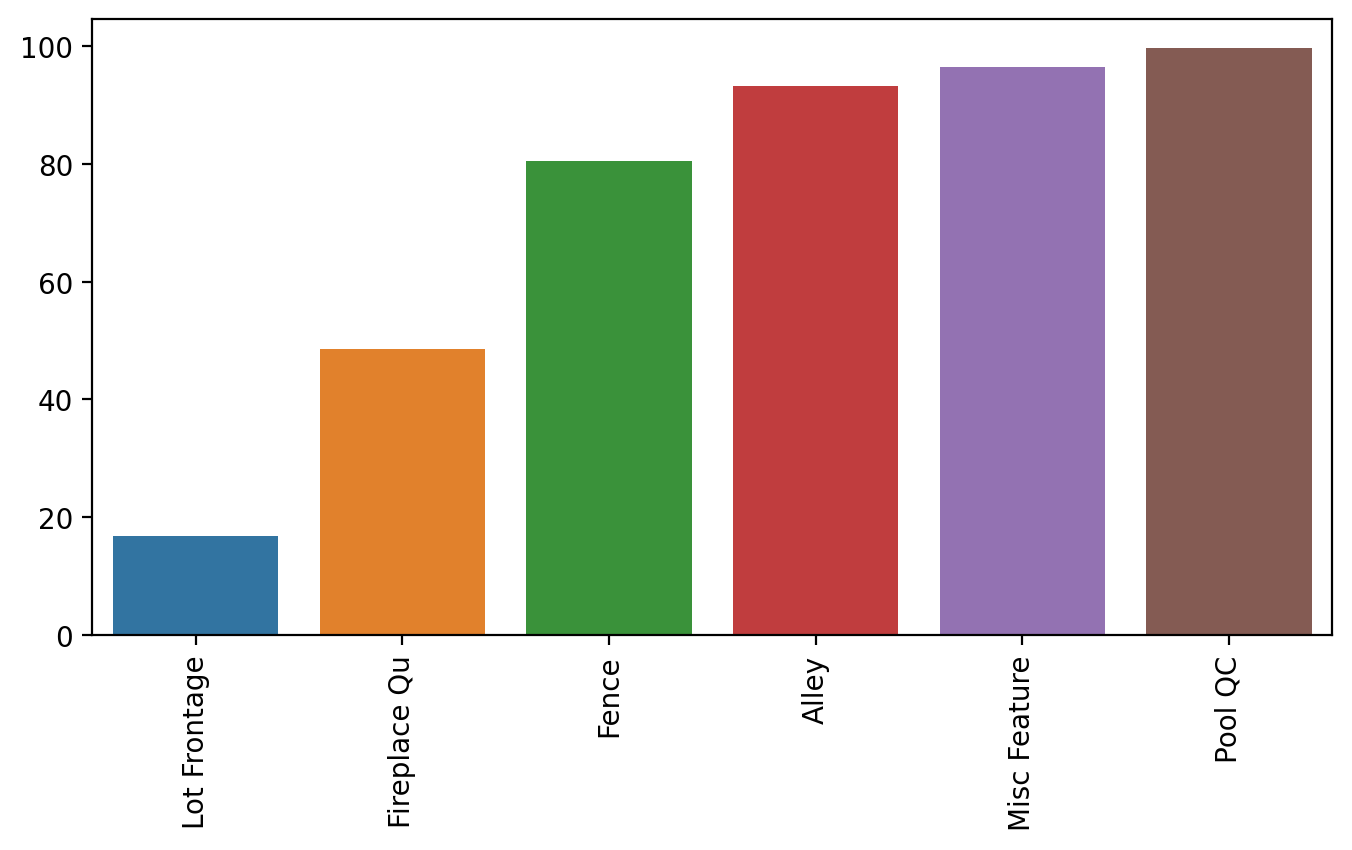

In [133]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percentNanResult.index,y=percentNanResult)
plt.xticks(rotation=90);

In [134]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [135]:
percentNanResult = percentMissing(df)

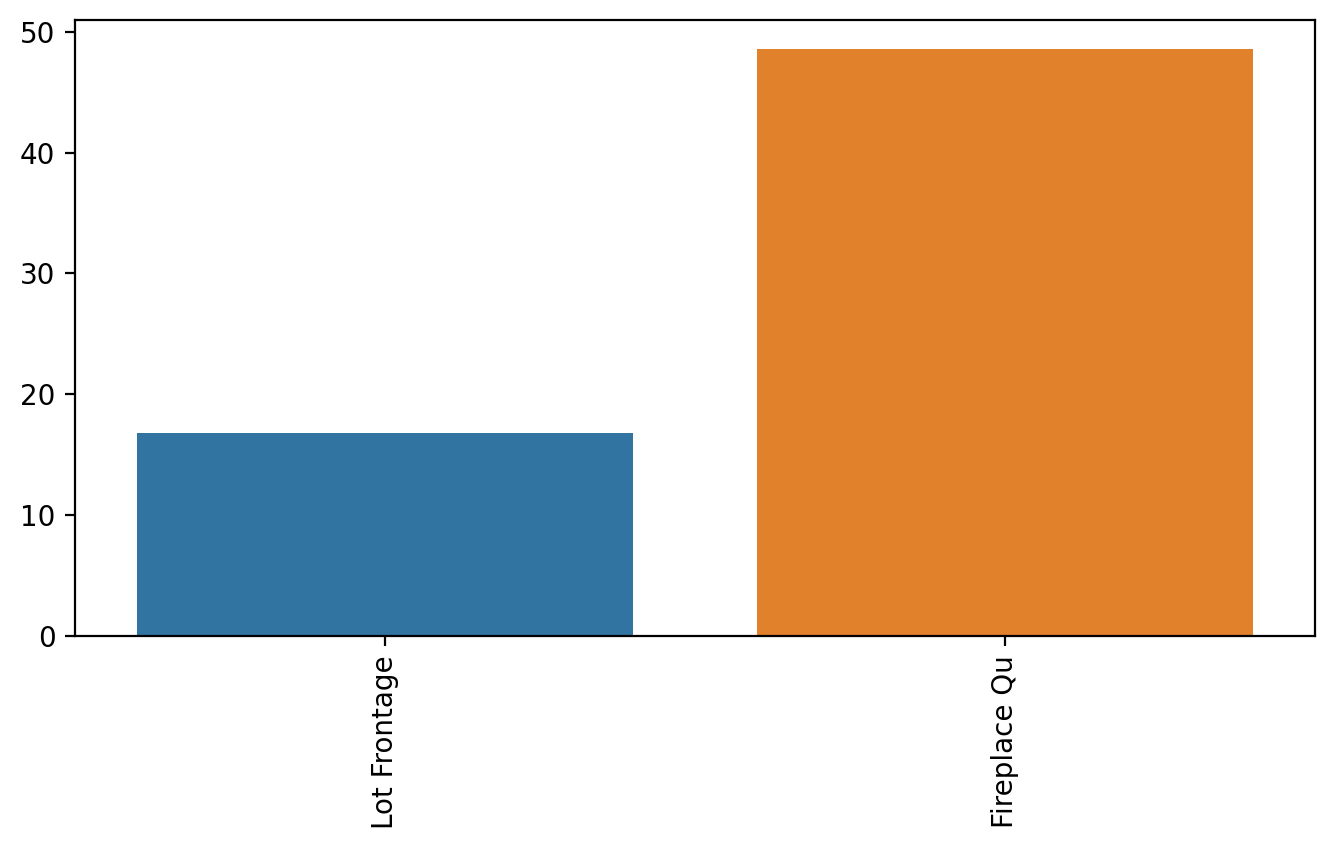

In [136]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percentNanResult.index,y=percentNanResult)
plt.xticks(rotation=90);

In [137]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [139]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [145]:
df['Lot Frontage'].value_counts()

0.0      490
60.0     276
80.0     137
70.0     133
50.0     116
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 129, dtype: int64

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

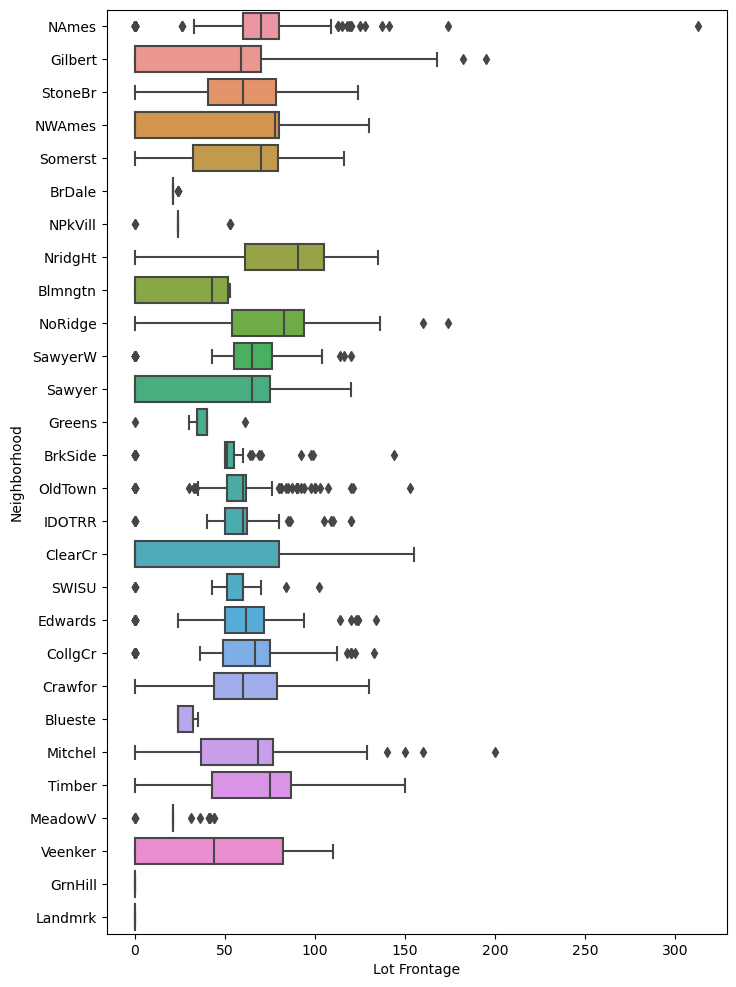

In [147]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

In [148]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    33.500000
Blueste    27.300000
BrDale     21.500000
BrkSide    49.074074
ClearCr    40.068182
CollgCr    58.779026
Crawfor    56.368932
Edwards    59.366492
Gilbert    49.921212
Greens     35.875000
GrnHill     0.000000
IDOTRR     58.315217
Landmrk     0.000000
MeadowV    22.837838
Mitchel    59.324561
NAmes      63.665914
NPkVill    25.695652
NWAmes     52.893130
NoRidge    69.690141
NridgHt    82.662651
OldTown    59.192469
SWISU      54.145833
Sawyer     48.384106
SawyerW    59.928000
Somerst    57.456044
StoneBr    56.078431
Timber     64.126761
Veenker    48.000000
Name: Lot Frontage, dtype: float64

In [150]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [151]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64